Task 1


In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Erdős-Rényi random graph and adjacency matrix A

#diagonal of A is from the network
def generate_er_graph(n, p):
    G = nx.erdos_renyi_graph(n, p, directed = True)
    A = nx.adjacency_matrix(G).toarray()
    return A

#diagonal of A is (constant)
def generate_er_graph2(n, p, constant):
    G = nx.erdos_renyi_graph(n, p, directed=True)
    A = nx.adjacency_matrix(G).toarray()
    np.fill_diagonal(A, constant)
    return A

#diagonal elements half (constant) and other half -(constant)
def generate_er_graph3(n, p, constant):
    G = nx.erdos_renyi_graph(n, p, directed=True)
    A = nx.adjacency_matrix(G).toarray()
    half_size = len(A) // 2
    np.fill_diagonal(A[:half_size, :half_size], constant)
    np.fill_diagonal(A[half_size:, half_size:], -constant)
    return A

#diagonal elements are at the exponential distribution of (scale) 
def generate_er_graph4(n, p, scale):
    G = nx.erdos_renyi_graph(n, p, directed=True)
    A = nx.adjacency_matrix(G).toarray()
    diag_values = np.random.exponential(scale=scale, size=len(A))
    np.fill_diagonal(A, diag_values)
    return A
# Function to generate a random diagonal matrix X
def generate_diagonal_matrix(n, mean, variance):
    diagonal = np.random.normal(loc=mean, scale=np.sqrt(variance), size=n)
    return np.diag(diagonal)

# Function to calculate the largest eigenvalue using the analytical formula
def calculate_largest_eigenvalue(n, X, A, p):
    mean_X = np.mean(np.diag(X))
    mean_diag_A = np.mean(np.diag(A))
    mean_outside_diag_A = np.mean(A[np.where(~np.eye(A.shape[0], dtype=bool))])  # Mean outside diagonal
    largest_eigenvalue = mean_X * (mean_diag_A + (n - 1) * mean_outside_diag_A)
    return largest_eigenvalue

# parameters
n = 500  # Size of the graph
p = 1  # Probability of edge creation in E-R graph
mean_X = 20  # Mean of the diagonal elements of X
variance_X = 0.2  # Variance of the diagonal elements of X
constant = 10
scale = 5

X = generate_diagonal_matrix(n, mean_X, variance_X)
A = generate_er_graph(n, p)
# M = X * A
M = np.dot(X, A)


Analytical largest eigenvalue: 9983.065932083298
Computed largest eigenvalue: 9983.055847491452


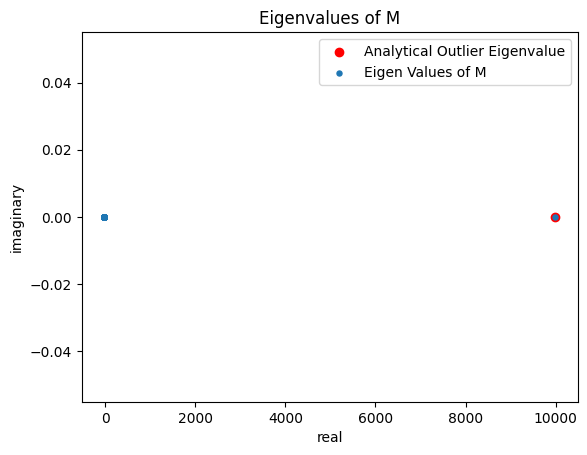

In [2]:
def plot_eigenvalues(M, title):
    eigenvalues_M = np.linalg.eigvals(M)
    plt.scatter(np.real(eigenvalues_M), np.imag(eigenvalues_M), label=title, s=13)
    outlier_eigenvalue = max(eigenvalues_M)
    print("Computed largest eigenvalue:", outlier_eigenvalue)

analytical_largest_eigenvalue = calculate_largest_eigenvalue(n, X, A, p)
print("Analytical largest eigenvalue:", analytical_largest_eigenvalue)

# Plotting the analytical largest eigenvalue
plt.scatter(np.real(analytical_largest_eigenvalue), np.imag(analytical_largest_eigenvalue), color='red', label='Analytical Outlier Eigenvalue')

# Plotting the eigenvalues
plot_eigenvalues(M, 'Eigen Values of M')
plt.xlabel('real')
plt.ylabel('imaginary')
plt.legend()
plt.title('Eigenvalues of M')
plt.show()


Analytical largest eigenvalue: 10201.675502486542
Computed largest eigenvalue: 10201.77104253317


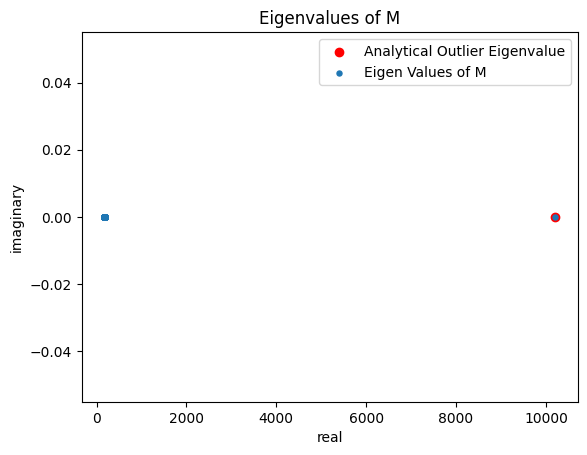

In [3]:
X = generate_diagonal_matrix(n, mean_X, variance_X)
A = generate_er_graph2(n, p, constant)
# M = X * A
M = np.dot(X, A)

def plot_eigenvalues(M, title):
    eigenvalues_M = np.linalg.eigvals(M)
    plt.scatter(np.real(eigenvalues_M), np.imag(eigenvalues_M), label=title, s=13)
    outlier_eigenvalue = max(eigenvalues_M)
    print("Computed largest eigenvalue:", outlier_eigenvalue)

analytical_largest_eigenvalue = calculate_largest_eigenvalue(n, X, A, p)
print("Analytical largest eigenvalue:", analytical_largest_eigenvalue)

# Plotting the analytical largest eigenvalue
plt.scatter(np.real(analytical_largest_eigenvalue), np.imag(analytical_largest_eigenvalue), color='red', label='Analytical Outlier Eigenvalue')

# Plotting the eigenvalues
plot_eigenvalues(M, 'Eigen Values of M')
plt.xlabel('real')
plt.ylabel('imaginary')
plt.legend()
plt.title('Eigenvalues of M')
plt.show()



Analytical largest eigenvalue: 9978.5670078256
Computed largest eigenvalue: 9981.996950807792


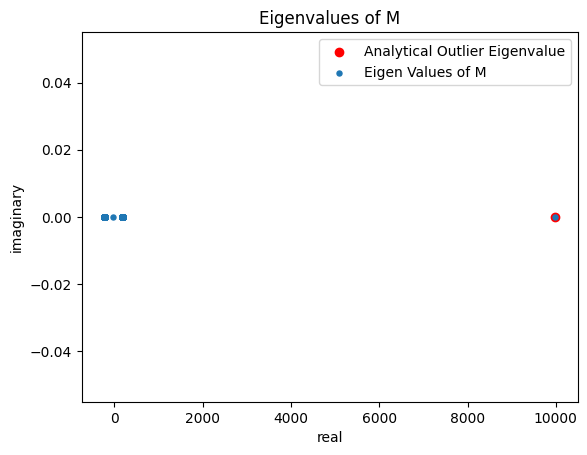

In [4]:
X = generate_diagonal_matrix(n, mean_X, variance_X)
A = generate_er_graph3(n, p, constant)
# M = X * A
M = np.dot(X, A)

def plot_eigenvalues(M, title):
    eigenvalues_M = np.linalg.eigvals(M)
    plt.scatter(np.real(eigenvalues_M), np.imag(eigenvalues_M), label=title, s=13)
    outlier_eigenvalue = max(eigenvalues_M)
    print("Computed largest eigenvalue:", outlier_eigenvalue)

analytical_largest_eigenvalue = calculate_largest_eigenvalue(n, X, A, p)
print("Analytical largest eigenvalue:", analytical_largest_eigenvalue)

# Plotting the analytical largest eigenvalue
plt.scatter(np.real(analytical_largest_eigenvalue), np.imag(analytical_largest_eigenvalue), color='red', label='Analytical Outlier Eigenvalue')

# Plotting the eigenvalues
plot_eigenvalues(M, 'Eigen Values of M')
plt.xlabel('real')
plt.ylabel('imaginary')
plt.legend()
plt.title('Eigenvalues of M')
plt.show()



Analytical largest eigenvalue: 10065.232931557397
Computed largest eigenvalue: (10066.313590405342+0j)


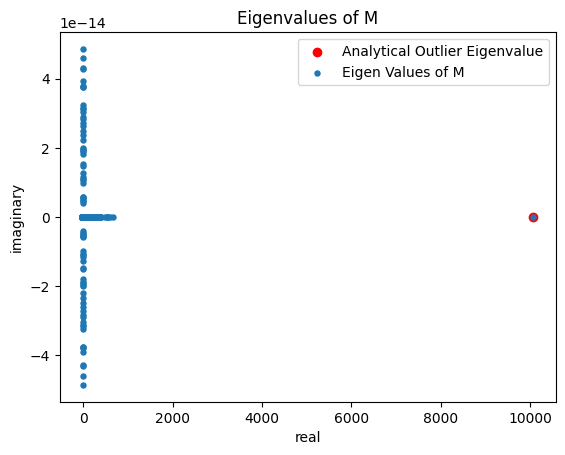

In [5]:
X = generate_diagonal_matrix(n, mean_X, variance_X)
A = generate_er_graph4(n, p, scale)
# M = X * A
M = np.dot(X, A)

def plot_eigenvalues(M, title):
    eigenvalues_M = np.linalg.eigvals(M)
    plt.scatter(np.real(eigenvalues_M), np.imag(eigenvalues_M), label=title, s=13)
    outlier_eigenvalue = max(eigenvalues_M)
    print("Computed largest eigenvalue:", outlier_eigenvalue)

analytical_largest_eigenvalue = calculate_largest_eigenvalue(n, X, A, p)
print("Analytical largest eigenvalue:", analytical_largest_eigenvalue)

# Plotting the analytical largest eigenvalue
plt.scatter(np.real(analytical_largest_eigenvalue), np.imag(analytical_largest_eigenvalue), color='red', label='Analytical Outlier Eigenvalue')

# Plotting the eigenvalues
plot_eigenvalues(M, 'Eigen Values of M')
plt.xlabel('real')
plt.ylabel('imaginary')
plt.legend()
plt.title('Eigenvalues of M')
plt.show()



Task 2

In [6]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Parameters
n = 500  # number of nodes
p = 0.1  # probability of edge creation
C = 3
# Erdős-Rényi network
G = nx.erdos_renyi_graph(n, p, directed = True)


In [7]:
# Degree of each node
degrees = np.array([d for n, d in G.degree()])

# Jacobian
def create_ER_Jacobian(n, p):
        G = nx.erdos_renyi_graph(n, p, directed = True)
        degrees = np.array([d for n, d in G.degree()])
        J = np.diag(C * degrees) + np.outer(degrees, degrees**2)
        return J

J = create_ER_Jacobian(n, p)


In [8]:
# Calculate the highest eigenvalues for Jacobians
eigenvalues = []
eigenvalues.append(np.linalg.eigvals(J))

# Analytical Eigen Value Caluculation
mean_diagonal = np.mean(np.diag(J))
mean_upper_triangle_J =np.mean(J[np.where(~np.eye(J.shape[0], dtype=bool))])
outlier_lambda_analytical = C * mean_diagonal + mean_upper_triangle_J * (n - 1)

Jacobian Largest Eigen value: (514418838.5415329+0j)
Calculated Largest Eigen Value: 506983949.4


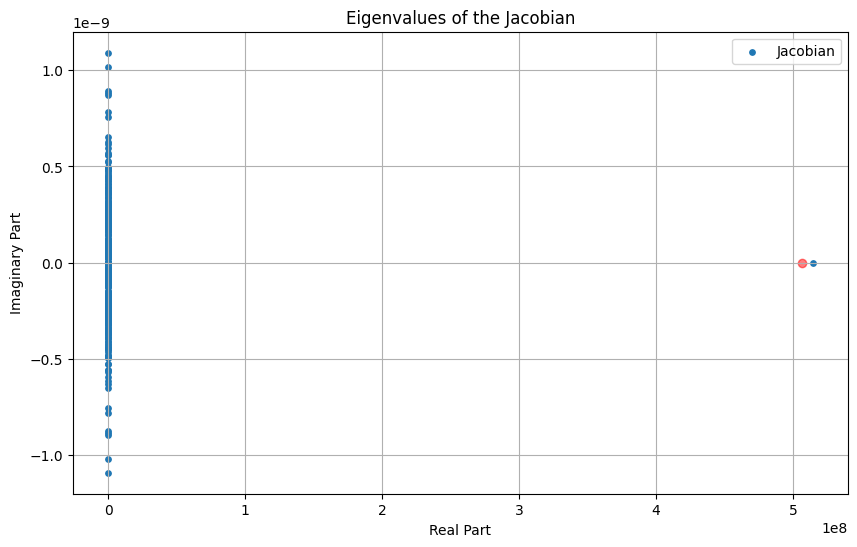

In [9]:
# Plot the eigenvalues of Jacobians

eigs = np.linalg.eigvals(J)
print("Jacobian Largest Eigen value:", max(eigs))
print("Calculated Largest Eigen Value:", outlier_lambda_analytical)

plt.figure(figsize=(10, 6))
plt.scatter(eigs.real, eigs.imag, label='Jacobian', s=15)  
plt.xlabel('Real Part')
plt.ylabel('Imaginary Part')
plt.title('Eigenvalues of the Jacobian')
plt.legend()
plt.grid(True)

# Plot the adjusted analytical outlier eigenvalue
plt.scatter(np.real(outlier_lambda_analytical), np.imag(outlier_lambda_analytical), color='red', label='Analytical Outlier Eigenvalue', alpha=0.5)
plt.show()


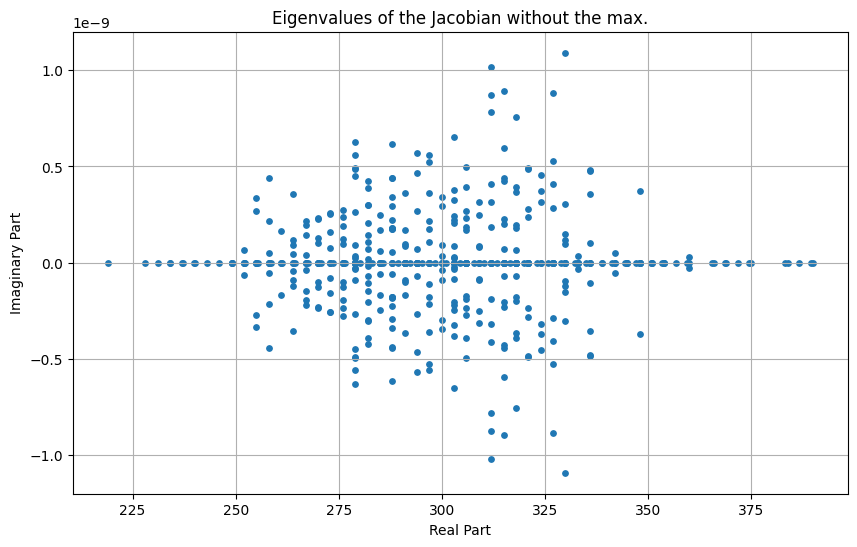

In [10]:
# Plot the eigenvalues of Jacobian without the outlier(max.) 
eigs = np.linalg.eigvals(J)
# Remove the maximum eigenvalue from eigs
eigs_without_max = eigs[eigs != max(eigs)]

plt.figure(figsize=(10, 6))
plt.scatter(eigs_without_max.real, eigs_without_max.imag, label='Jacobian', s=15)  
plt.xlabel('Real Part')
plt.ylabel('Imaginary Part')
plt.title('Eigenvalues of the Jacobian without the max.')
plt.grid(True)

plt.show()


/home/imami/miniconda3/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/imami/miniconda3/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


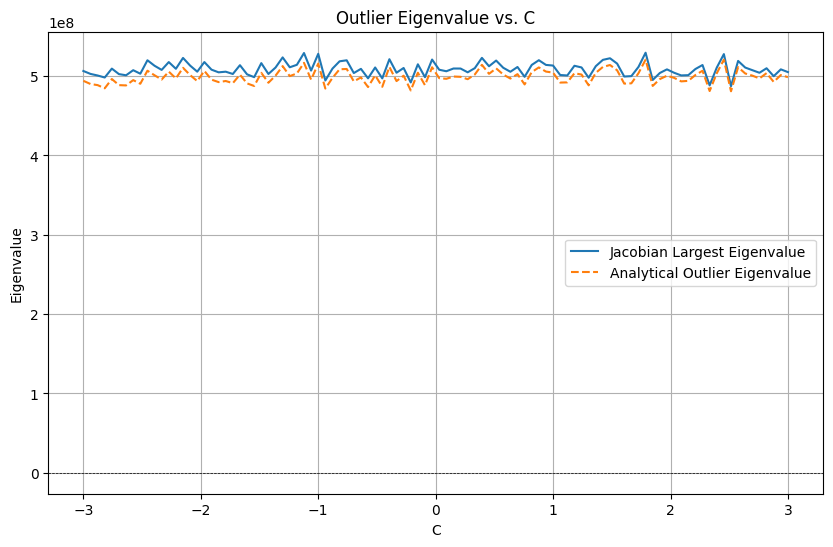

In [11]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Parameters
n = 500  # number of nodes
p = 0.1  # probability of edge creation

# Function to create the Jacobian matrix for an Erdős-Rényi graph
def create_ER_Jacobian(n, p, C):
    G = nx.erdos_renyi_graph(n, p, directed=True)
    degrees = np.array([d for n, d in G.degree()])
    J = np.diag(C * degrees) + np.outer(degrees, degrees**2)
    return J

# Function to calculate the analytical outlier eigenvalue
def calculate_outlier_eigenvalue(J, C):
    mean_diagonal = np.mean(np.diag(J))
    mean_upper_triangle_J = np.mean(J[np.where(~np.eye(J.shape[0], dtype=bool))])
    return C * mean_diagonal + mean_upper_triangle_J * (n - 1)

# Varying C from -3 to 3
C_values = np.linspace(-3, 3, 100)
outlier_eigenvalues = []
analytical_outlier_eigenvalues = []

# Calculate the largest eigenvalue and analytical outlier eigenvalue for each value of C
for C in C_values:
    J = create_ER_Jacobian(n, p, C)
    eigs = np.linalg.eigvals(J)
    outlier_eigenvalues.append(max(eigs))
    analytical_outlier_eigenvalues.append(calculate_outlier_eigenvalue(J, C))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(C_values, outlier_eigenvalues, label='Jacobian Largest Eigenvalue')
plt.plot(C_values, analytical_outlier_eigenvalues, label='Analytical Outlier Eigenvalue', linestyle='--')
plt.xlabel('C')
plt.ylabel('Eigenvalue')
plt.title('Outlier Eigenvalue vs. C')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')  # Add a horizontal line at y=0
plt.legend()
plt.grid(True)
plt.show()
